In [1]:
# Devoir 1
# Mesures de similarité - Test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MNIST: TEST POUR 20 PREMIÈRES IMAGES de mnist_train
mnist_train = pd.read_csv('mnist_train.csv')
mnist_test = pd.read_csv('mnist_test.csv')

x_train = mnist_train.drop('label', axis = 1).values
y_train = mnist_train.loc[:, 'label'].values
x_test = mnist_test.drop('label', axis = 1).values
y_test = mnist_test.loc[:, 'label'].values



In [3]:
x_train = x_train[0:100,:]
y_train = y_train[0:100]
x_test = x_test[0:100,:]
y_test = y_test[0:100]

print(y_train)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


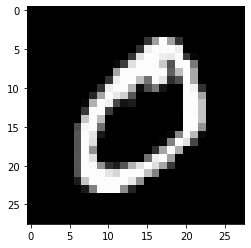

In [4]:
# Tirée du TP1
image = x_train[1]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()

for i in range(len(x_train)):
    for j in range(len(x_train[0])):
        if x_train[i][j] != 0:
            x_train[i][j] = round(int(x_train[i][j])/255.0)
for i in range(len(x_test)):
    for j in range(len(x_test[0])):
        if x_test[i][j] != 0:
            x_test[i][j] = round(int(x_test[i][j])/255.0)

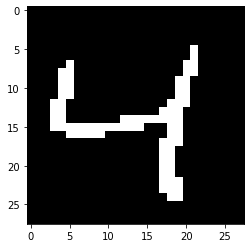

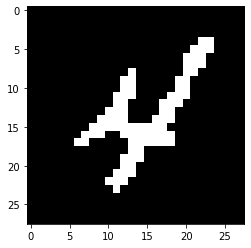

In [5]:
# On transforme l'image afin que les pixels soient uniquement des valeurs 0 ou 1.
image = x_train[2]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()
image = x_train[9]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()

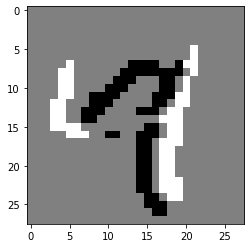

Nombre de pixels blancs: 61
Nombre de pixels noirs: 71
Nombre de pixels gris: 652


In [5]:
# Début de la mesure de dissimilarité entre deux images:

# ÉTAPE 1: Créer une image qui est la différence entre les deux images
# -1 sont représentés par des pixels noirs, 1: blanc et 0: gris

image = x_train[2] - x_train[4]
matrix_image = np.reshape(image, (28,28))
plt.imshow(matrix_image, cmap='gray')
plt.show()

ones = np.count_nonzero(image == 1)
ones_neg = np.count_nonzero(image == -1)
zeros = np.count_nonzero(image == 0)

print(f'Nombre de pixels blancs: {ones}')
print(f'Nombre de pixels noirs: {ones_neg}')
print(f'Nombre de pixels gris: {zeros}')

In [6]:
# white_matrix: matrice des pixels blancs selon leur position (28x28). Au lieu d'avoir des valeurs qui sont uniquement des "1", 
# ce dernier est remplacé par sa position en colonne.

# Par exemple: supposons qu'il existe un pixel blanc à la 7e ligne et à la 18e colonne.
# white_matrix va contenir donc la valeur "18" à la position (7,18).

# Même principe pour dark_matrix, mais pour les pixels noirs.

white_matrix = np.zeros((28,28))
dark_matrix = np.zeros((28,28))

for i in range(matrix_image.shape[0]):
    for j in range(matrix_image.shape[0]):
        if matrix_image[i][j] == 1:
            white_matrix[i][j] = j
        elif matrix_image[i][j] == -1:
            dark_matrix[i][j] = j

In [7]:
# On va comparer à quel point les pixels blancs sont loins aux pixels noirs pour CHAQUE ligne.
# La complexité augmentera en raison du nombre de combinaisons de distances à calculer.

# Tentative: pour CHAQUE ligne, on prend un seul pixel noir et blanc qui représentent la majorité des pixels noirs et blancs.
# Ici, on choisit de prendre la médiane.

white_array = np.zeros(28)
dark_array = np.zeros(28)

white_median = 0
dark_median = 0

for i in range(matrix_image.shape[0]):
    white_median = np.median(white_matrix[i,:][white_matrix[i,:] != 0])
    white_array[i] = white_median
    
    dark_median = np.median(dark_matrix[i,:][dark_matrix[i,:] != 0])
    dark_array[i] = dark_median

white_array[np.isnan(white_array)] = 0
white_array = np.round(white_array).astype(int)
dark_array[np.isnan(dark_array)] = 0
dark_array = np.round(dark_array).astype(int)

# Résumé chaque ligne par la médiane
print(white_array)
print(dark_array)

[ 0  0  0  0  0 21 21 20  5  5  5 12 12 11 17  6  7 18 18 18 18 18 18 18
 18  0  0  0]
[ 0  0  0  0  0  0  0 15 16 13 12 11 10 12  8 16 14 14 14 14 14 14 14 14
 16 16 16  0]


C:\Users\guomu\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\guomu\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
simple_matrix = np.zeros((28,28))

for i in range(white_array.shape[0]):
    if white_array[i] != 0:
        simple_matrix[i][white_array[i]] = 1
    if dark_array[i] != 0:
        simple_matrix[i][dark_array[i]] = -1  

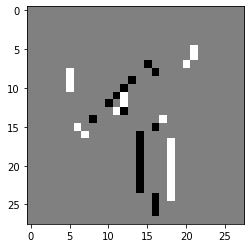

In [9]:
# Simplfication de l'image en conservant uniquement les pixels préservant la forme générale
plt.imshow(simple_matrix, cmap='gray')
plt.show()

In [10]:
# CAS #1: Si on a un pixel noir et blanc sur une ligne. On calcule la distance entre les deux.
#         Autrement dit, si à la 7e ligne, pixel blanc se trouve à la 23e colonne et pixel noir se trouve à la 25e colonne,
#         on aura une dissimilarité de 2 pixels à la 7e ligne.
# CAS #2: Si on a un seul type de pixel sur une ligne (blanc OU noir). On incrémente la dissimilarité de 1 pour dire qu'il
#         existe un pixel supplémentaire.

# Dissimilarité = Sum(i) pour 1 à 28 abs{xi - yi} où xi = 1 si yi = 0, yi = 1 si xi = 0

for i in range(white_array.shape[0]):
    if white_array[i] == 0 and dark_array[i] != 0:
        dark_array[i] = 1
    elif white_array[i] != 0 and dark_array[i] == 0:
        white_array[i] = 1

dissimilarity = np.sum(abs(white_array - dark_array))
print(dissimilarity)

95


In [11]:
# Notion de similarité:
# Nombre de pixels entre les pixels blancs et noirs et nombre supplémentaire de pixels

In [5]:
# Copiés de l'exemple pour le TP1

#classification
from sklearn.neighbors import KNeighborsClassifier #k-plus proches voisins

#Partitionnement
from sklearn.cluster import AgglomerativeClustering #Regroupement hiérarchique (Paritionnement binaire)
from pyclustering.cluster.kmedoids import kmedoids

#réduction de dimensionnalité
from sklearn.decomposition import KernelPCA #ce n'est pas PCoA mais on peut l'utiliser pour que le résultat soit le même
from sklearn.manifold import Isomap

#score silhouette
from pyclustering.cluster.silhouette import silhouette

In [54]:
# KMedoids
data_points = []

# Should put 10 when using all data
initial_medoids = [1,2,3,4,5,6,7,8,9,10]

kmedoids_instance = kmedoids(x_train,initial_medoids,nclusters=10)

kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [55]:
print('Medoides:')
for i in medoids:
    print(i)
    
print('\nAssignation aux groupes:')
for label, cluster in enumerate(clusters):
    for i in cluster:
        print('label {0}:　{1}'.format(label, i))

Medoides:
88
26
23
81
33
39
7
72
97
98

Assignation aux groupes:
label 0:　51
label 0:　56
label 0:　60
label 0:　68
label 0:　88
label 1:　2
label 1:　4
label 1:　16
label 1:　20
label 1:　26
label 1:　38
label 1:　42
label 1:　45
label 1:　47
label 1:　52
label 1:　54
label 1:　58
label 1:　84
label 1:　92
label 1:　96
label 2:　3
label 2:　11
label 2:　23
label 2:　29
label 2:　46
label 2:　53
label 2:　59
label 2:　61
label 2:　76
label 2:　77
label 2:　78
label 2:　99
label 3:　1
label 3:　21
label 3:　34
label 3:　37
label 3:　63
label 3:　69
label 3:　75
label 3:　81
label 3:　95
label 4:　5
label 4:　9
label 4:　15
label 4:　19
label 4:　22
label 4:　28
label 4:　33
label 4:　43
label 4:　57
label 4:　71
label 4:　79
label 4:　87
label 4:　89
label 4:　91
label 5:　13
label 5:　32
label 5:　36
label 5:　39
label 5:　62
label 5:　64
label 5:　66
label 5:　73
label 5:　80
label 5:　83
label 5:　90
label 5:　93
label 6:　7
label 6:　25
label 6:　27
label 6:　49
label 6:　82
label 7:　6
label 7:　8
label 7:　14
label 7:　18
label 7:　24
label 7:　30
label 7:

In [56]:
# Score silhouette
print(np.nanmean(silhouette(x_train, clusters).process().get_score()))

0.17158580442186888


In [57]:
# V measure
from sklearn.metrics import v_measure_score
labels_pred = np.zeros(len(x_train))

# Assume qu'on associe à chaque cluster le "vrai" label le plus populaire
# Pourrait fusionner certains clusters par ce processus
for label, cluster in enumerate(clusters):
    counter = np.zeros(10)
    for i in cluster:        
        #print('label {0}:　{1}'.format(label, i))
        counter[y_train[i]] += 1
        
    max = np.argmax(counter)
    for i in cluster:
        labels_pred[i] = max        

print(v_measure_score(y_train, labels_pred))

0.6125949899583092


In [18]:
from sklearn.model_selection import train_test_split

# K-neighbors

# Split to train and val (to select best k)
knn_x_train, knn_x_val, knn_y_train, knn_y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# Test with k different k
max_k = min(int(len(x_train)/10), 50)

score_val = np.zeros(max_k)
for k in np.arange(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, metric = "euclidean")
    knn.fit(knn_x_train, knn_y_train)
    score_val[k-1] = knn.score(knn_x_val, knn_y_val)
    

best_k = score_val.argmax() + 1;
knn = KNeighborsClassifier(n_neighbors=best_k, metric="euclidean")
knn.fit(knn_x_train, knn_y_train)

print(knn.score(x_test,y_test))
print("Meilleur k : " + str(best_k))

0.64
Meilleur k : 2


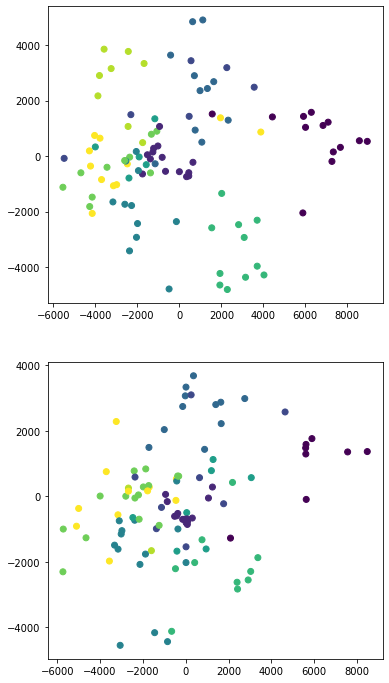

In [43]:
# Isomap
# Isomap(n_components=1, n_neighbors=2, metric='precomputed')
# Default n_neighbors = 5
isomap = Isomap(n_components=2, metric="euclidean")
isomap_train = isomap.fit_transform(x_train)
isomap_test = isomap.transform(x_test)


fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(211)
#ax.set_title('Title1')
ax.scatter(np.delete(isomap_train,1,1),np.delete(isomap_train,0,1),c=y_train);

ax = fig.add_subplot(212)
#ax.set_title('Title2')
ax.scatter(np.delete(isomap_test,1,1),np.delete(isomap_test,0,1),c=y_test);

#TODO: how to evaluate quality?

In [12]:
# PCoA
import math

def euclidean_distance(x, y):
    dist = 0;
    arrayX = x.ravel()
    arrayY = y.ravel()
    for i in range(0,len(arrayX)):
        dist += (int(arrayX[i]) - int(arrayY[i]))**2
    return math.sqrt(dist)

def get_euclidean_distance_matrix(X, Y=None):
    Y = X if Y is None else Y
    matrix = np.zeros(len(X) * len(Y))
    cnt = 0
    for i in X:
        for j in Y:
            matrix[cnt] = euclidean_distance(i,j)
            cnt += 1
    
    return matrix



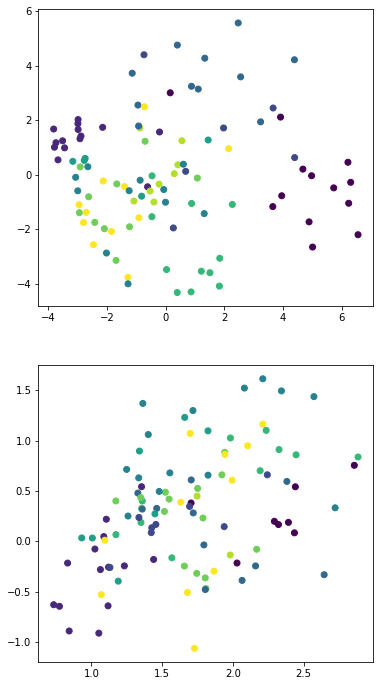

In [23]:
pcoa = KernelPCA(n_components=2, kernel='precomputed')
train_distance = get_euclidean_distance_matrix(x_train).reshape(len(x_train),len(x_train))
test_distance = get_euclidean_distance_matrix(x_test).reshape(len(x_test), len(x_test))

pcoa_train = pcoa.fit_transform(-.5*train_distance**2) #-.5*D**2 est crucial!!!
pcoa_test = pcoa.transform(-.5*test_distance**2) #-.5*D**2 est crucial!!!

fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot(211)
#ax.set_title('Titre1')
ax.scatter(np.delete(pcoa_train,1,1),np.delete(pcoa_train,0,1),c=y_train);

ax = fig.add_subplot(212)
#ax.set_title('Titre2')
ax.scatter(np.delete(pcoa_test,1,1),np.delete(pcoa_test,0,1),c=y_test);

In [58]:
# Partitionnement binaire

# Copié du code fourni
def agglomerative_clustering_predict(agglomerative_clustering, dissimilarity_matrix):
    average_dissimilarity = list()
    for i in range(agglomerative_clustering.n_clusters):
        ith_clusters_dissimilarity = dissimilarity_matrix[:, np.where(agglomerative_clustering.labels_==i)[0]]
        average_dissimilarity.append(ith_clusters_dissimilarity.mean(axis=1))
    return np.argmin(np.stack(average_dissimilarity), axis=0)

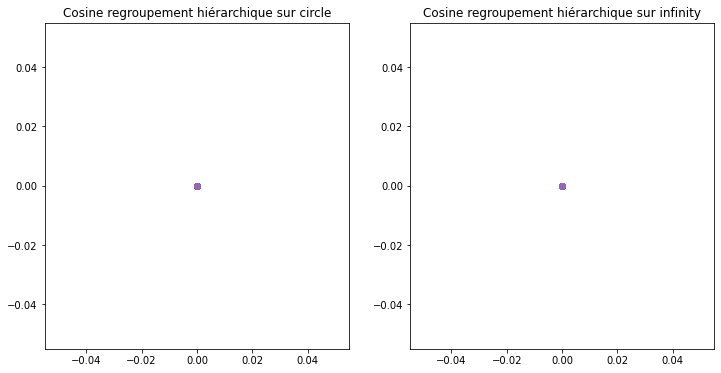

In [60]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='average')
agglomerative_clustering.fit(train_distance)

agglo_circle = agglomerative_clustering_predict(agglomerative_clustering, train_distance)
agglo_infinity = agglomerative_clustering_predict(agglomerative_clustering, test_distance)

fig = plt.figure(figsize=(12, 6))
circle_ax = fig.add_subplot(121)
infinity_ax = fig.add_subplot(122)
#circle_ax.set_title('Titre1')
#infinity_ax.set_title('Titre2')

for i in range(5):
    # TODO: ???
    circle_cluster = x_train[np.where(agglo_circle == i)[0]]
    circle_ax.scatter(circle_cluster[:, 0], circle_cluster[:, 1])
    
    infinity_cluster = x_test[np.where(agglo_infinity == i)[0]]
    infinity_ax.scatter(infinity_cluster[:, 0], infinity_cluster[:, 1])

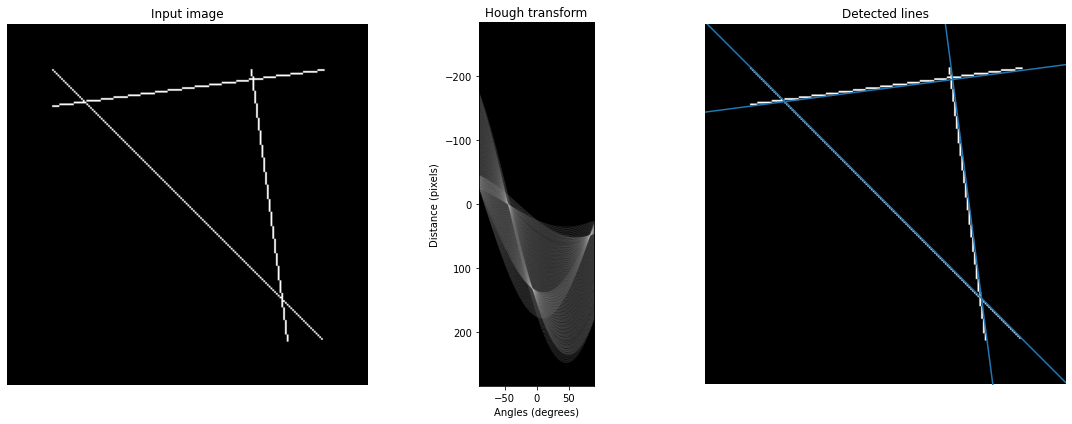

In [7]:
# Warning: code copy-pasted from https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html
# as reference, must modify it
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[line(45, 25, 25, 175)] = 255
image[line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

In [ ]:
# Copied from https://scikit-image.org/docs/dev/auto_examples/edges/plot_circular_elliptical_hough_transform.html
# Must be adapted
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()


In [10]:
from skimage.morphology import skeletonize
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks

from matplotlib import cm

# TODO: add alpha?
# Compare only angles for lines and approx R?
# Replace by similarity? performs poorly when lines not detected
def distance1(x, y, alpha=0.7):
    img1 = skeletonize(x.reshape((28,28)))
    img2 = skeletonize(y.reshape((28,28)))   
    # Tester à chaque 5 degrés
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 36, endpoint=False)    
    h1, theta1, d1 = hough_line(img1, theta = tested_angles) 
    h2, theta2, d2 = hough_line(img2, theta = tested_angles)    
    tested_R = [1,2,3,4,5,6,7,8,9,10]
    H1 = hough_circle(img1, tested_R)
    H2 = hough_circle(img2, tested_R)
    
    return alpha * euclidean_distance(h1,h2) + (1-alpha) * euclidean_distance(H1, H2)

def get_distance1_matrix(X, Y=None):
    Y = X if Y is None else Y
    matrix = np.zeros(len(X) * len(Y))
    cnt = 0
    for i in X:
        for j in Y:
            matrix[cnt] = distance1(i,j)
            cnt += 1    
    return matrix

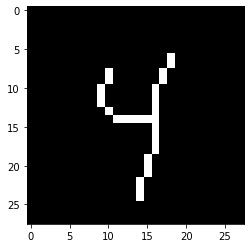

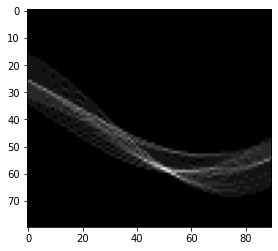

NameError: name 'bounds' is not defined

In [9]:
img = skeletonize(x_train[26].reshape((28,28)))

plt.imshow(img, cmap=cm.gray)
plt.show()

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 90, endpoint=False)

h, theta, d = hough_line(img, theta = tested_angles)

hp, thetap, dp = hough_line(x_train[2].reshape((28,28)))

plt.imshow(h, cmap=cm.gray)
plt.show()
plt.imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
plt.show()

plt.imshow(img, cmap=cm.gray)


ht, tt, dt = hough_line_peaks(h,theta,d)
htp, ttp, dtp = hough_line_peaks(hp,thetap,dp)
print(ht, tt, dt)



for _, angle, dist in zip(*(ht, tt, dt)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
plt.show()
    

h2, theta2, d2 = hough_line(skeletonize(x_train[9].reshape((28,28))), theta=tested_angles)
print(euclidean_distance(h, h2))

plt.imshow(np.log(1 + h2), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
plt.show()
plt.imshow(skeletonize(x_train[9].reshape((28,28))),cmap=cm.gray)
ht, tt, dt = hough_line_peaks(h2,theta2,d2)
for _, angle, dist in zip(*(ht, tt, dt)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
plt.show()

print(ht, tt, dt)

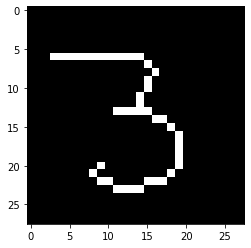

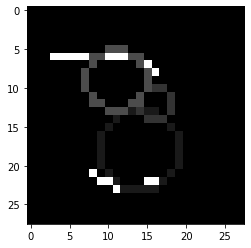

In [92]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks

# Test for circles
img = skeletonize(x_train[12].reshape((28,28)))

plt.imshow(img, cmap=cm.gray)
plt.show()

tested_R = [2,3,4,5,6,7,8,9,10]
H1 = hough_circle(img, tested_R)

accums, cx, cy, radii = hough_circle_peaks(H1, tested_R,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))

image = np.zeros(28 * 28)
cnt = 0
for i in img:
    for j in i:
        if j:
            image[cnt] = 1
        else:
            image[cnt] = 0
        cnt += 1
image = image.reshape(28,28)
cnt = 0.1;
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=img.shape)
    image[circy, circx] = cnt;
    cnt += 0.1;
    pass

ax.imshow(image,cmap=cm.gray)
plt.show()

In [68]:
import time

x_train_r = x_train[0:100]
x_test_r = x_test[0:100]
y_train_r = y_train[0:100]
y_test_r = y_test[0:100]
time1 = time.time()
        
pcoa = KernelPCA(n_components=2, kernel='precomputed')

train_distance = get_distance1_matrix(x_train_r).reshape(len(x_train_r),len(x_train_r))
test_distance = get_distance1_matrix(x_test_r).reshape(len(x_test_r), len(x_test_r))

pcoa_train = pcoa.fit_transform(-.5*train_distance**2) #-.5*D**2 est crucial!!!
pcoa_test = pcoa.transform(-.5*test_distance**2) #-.5*D**2 est crucial!!!

fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot(211)
#ax.set_title('Titre1')
ax.scatter(np.delete(pcoa_train,1,1),np.delete(pcoa_train,0,1),c=y_train_r);

ax = fig.add_subplot(212)
#ax.set_title('Titre2')
ax.scatter(np.delete(pcoa_test,1,1),np.delete(pcoa_test,0,1),c=y_test_r);
time2 = time.time()
print(time2 - time1)  
#    tested_R = [1,2,3,4,5,6,7,8,9,10]
#    H1 = hough_circle(img1, tested_R)
#    H2 = hough_circle(img2, tested_R)

KeyboardInterrupt: 

In [19]:
from sklearn.model_selection import train_test_split
import time

time1 = time.time()

x_train_r = x_train[0:100]
x_test_r = x_test[0:100]
y_train_r = y_train[0:100]
y_test_r = y_test[0:100]

# K-neighbors

# Split to train and val (to select best k)
knn_x_train, knn_x_val, knn_y_train, knn_y_val = train_test_split(x_train_r, y_train_r, test_size=0.2, random_state=0)


train_distance = get_distance1_matrix(knn_x_train).reshape(len(knn_x_train),len(knn_x_train))
val_distance = get_distance1_matrix(knn_x_val, knn_x_train).reshape(len(knn_x_val), len(knn_x_train))
test_distance = get_distance1_matrix(x_test_r, knn_x_train).reshape(len(x_test_r), len(knn_x_train))


# Test with k different k
max_k = min(int(len(knn_x_train)/2), 50)

score_val = np.zeros(max_k)
for k in np.arange(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed', algorithm='brute')
    knn.fit(train_distance, knn_y_train)
    score_val[k-1] = knn.score(val_distance, knn_y_val)
    

best_k = score_val.argmax() + 1;

knn = KNeighborsClassifier(n_neighbors=best_k, metric='precomputed', algorithm='brute')
knn.fit(train_distance, knn_y_train)

print(knn.score(test_distance,y_test_r))
#print(knn.score(train_distance,y_test_r))
print("Meilleur k : " + str(best_k))

time2 = time.time()
print(time2-time1)

0.7
Meilleur k : 1
148.98483610153198


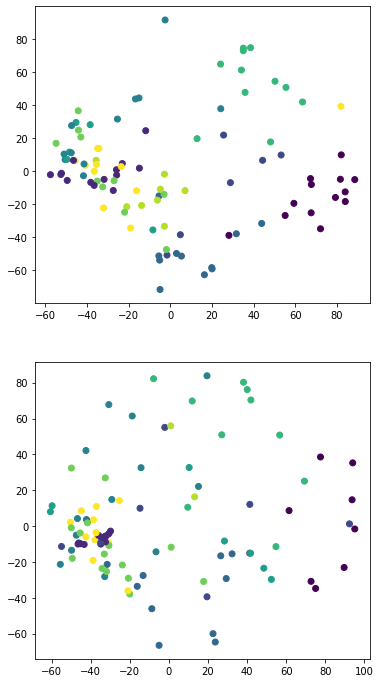

In [22]:
# Isomap

train_distance = get_distance1_matrix(x_train).reshape(len(x_train),len(x_train))
test_distance = get_distance1_matrix(x_test, x_train).reshape(len(x_test), len(x_train))

isomap = Isomap(n_components=2, metric="precomputed")
isomap_train = isomap.fit_transform(train_distance)
isomap_test = isomap.transform(test_distance)


fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(211)
#ax.set_title('Title1')
ax.scatter(np.delete(isomap_train,1,1),np.delete(isomap_train,0,1),c=y_train);

ax = fig.add_subplot(212)
#ax.set_title('Title2')
ax.scatter(np.delete(isomap_test,1,1),np.delete(isomap_test,0,1),c=y_test);

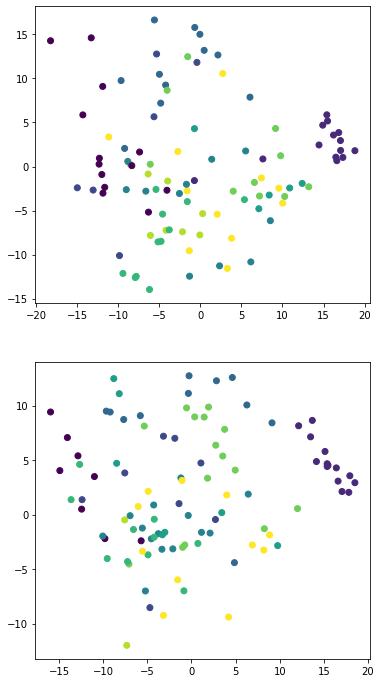

In [24]:
#PCoA
pcoa = KernelPCA(n_components=2, kernel='precomputed')
train_distance = get_distance1_matrix(x_train).reshape(len(x_train),len(x_train))
test_distance = get_distance1_matrix(x_test, x_train).reshape(len(x_test), len(x_train))

pcoa_train = pcoa.fit_transform(-.5*train_distance**2) #-.5*D**2 est crucial!!!
pcoa_test = pcoa.transform(-.5*test_distance**2) #-.5*D**2 est crucial!!!

fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot(211)
#ax.set_title('Titre1')
ax.scatter(np.delete(pcoa_train,1,1),np.delete(pcoa_train,0,1),c=y_train);

ax = fig.add_subplot(212)
#ax.set_title('Titre2')
ax.scatter(np.delete(pcoa_test,1,1),np.delete(pcoa_test,0,1),c=y_test);

In [33]:
# K-Medoids
initial_medoids = [1,2,3,4,5,6,7,8,9,10]

# Uncomment if not running precedent algos
#train_distance = get_distance1_matrix(x_train).reshape(len(x_train),len(x_train))
#test_distance = get_distance1_matrix(x_test, x_train).reshape(len(x_test), len(x_train))

train_distance = get_euclidean_distance_matrix(x_train).reshape(len(x_train),len(x_train))
test_distance = get_euclidean_distance_matrix(x_test, x_train).reshape(len(x_test), len(x_train))

kmedoids_instance = kmedoids(train_distance,initial_medoids,nclusters=10,data_type="distance_matrix")

kmedoids_instance.process()

kmedoids_test = kmedoids_instance.predict(test_distance)
print(kmedoids_test)

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

label_mapping = {}

for label, cluster in enumerate(clusters):
    counter = np.zeros(10)
    for i in cluster:        
        #print('label {0}:　{1}'.format(label, i))
        counter[y_train[i]] += 1
        
    max = np.argmax(counter)
    
    label_mapping[label] = max  

score = 0
cnt = 0
for i in kmedoids_test:
    if label_mapping[i] == y_test[cnt]:
        score += 1
    cnt += 1
print(label_mapping)
print(score/len(y_test))

[4 9 7 8 1 7 1 1 0 3 0 1 1 8 7 9 1 1 0 1 4 1 1 1 1 8 1 1 8 7 9 7 9 1 3 0 1
 7 9 7 7 4 1 1 9 9 9 1 0 1 5 0 1 1 0 8 1 7 1 7 1 6 1 6 3 1 1 1 0 0 1 8 0 6
 7 4 9 1 4 3 1 5 0 1 1 0 4 9 1 7 9 5 7 9 7 0 7 9 5 1]
{0: 3, 1: 4, 2: 1, 3: 7, 4: 9, 5: 6, 6: 8, 7: 1, 8: 0, 9: 3}
0.5
